### Problem Statement
The goal of this project is to predict customer churn for a telecom company using machine learning techniques.

### Column Descriptions:
- **Churn** : Indicates whether a customer has churned (1) or not (0).
- **AccountWeeks** : The number of weeks the account has active account.
- **ContractRenewal** : Indicates whether the contract has been renewed (1) or not.
- **DataPlan** : Indicates whether the customer has a data plan (1) or not.
- **DataUsage** : The amount of data used by the customer monthly in GB.
- **CustServCalls** : The number of customer service calls made by the customer.
- **DayMins** : The total number of minutes used during the day.
- **DayCalls** : The total number of calls made during the day.
- **MonthlyCharge** : The monthly charge for the customer.
- **OverageFee** : Lagest overage fee charged to the customer in last 12 months.
- **RoamMins** : Average roaming minutes used by the customer.


### Importing Essential Libraries

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fw
fw('ignore')

In [3]:
%pwd

'/Users/devanshpratap28/Downloads/My Folder/Telecom-Churn-SE/research'

In [4]:
os.chdir("..")

In [5]:
df = pd.read_csv('data/telecom_churn.csv')

In [6]:
df.shape

(3333, 11)

In [7]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [8]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [9]:
cols = list(df.columns)

In [10]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
for i in cols :
    print(f"{i}-->{df[i].dtype}")

Churn-->int64
AccountWeeks-->int64
ContractRenewal-->int64
DataPlan-->int64
DataUsage-->float64
CustServCalls-->int64
DayMins-->float64
DayCalls-->int64
MonthlyCharge-->float64
OverageFee-->float64
RoamMins-->float64


#### Observations:
- `Churn`,`ContractRenewal` and `DataPlan` are categorical columns but given as integers.

In [13]:
corr_map = round(df.corr(),3)

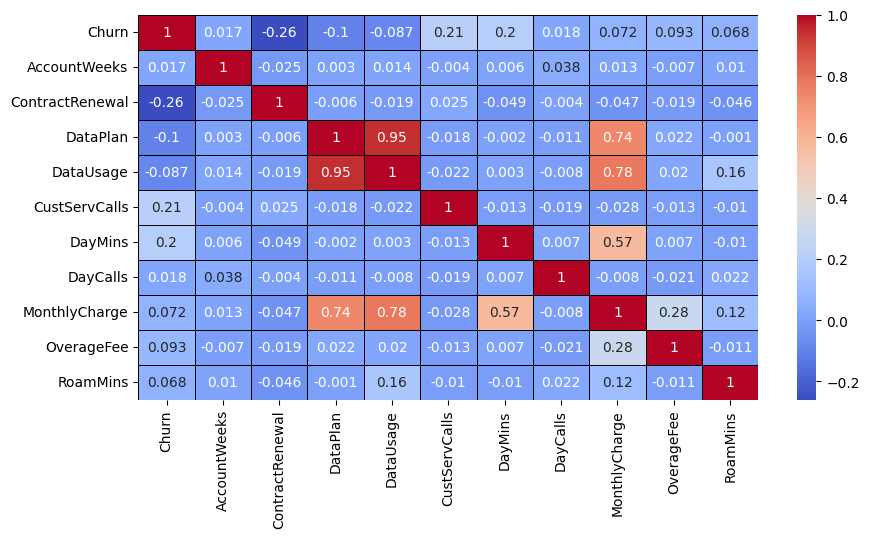

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_map,cmap='coolwarm',annot=True,linewidths=0.5,linecolor="black")
plt.show()

### Observations:
- The dataset contains no missing values and no duplicate rows.
- The dataset has 3333 rows and 11 columns.
- `DataUsage` and `DataPlan` are highly positiviely correlated with each other and this is expected as customers will use more data if they have a data plan.So we can drop one of them like here I am dropping `DataPlan` beacuse `DataUsage` is more informative.

In [15]:
df.drop(columns=['DataPlan'],inplace=True)

In [16]:
for i in ['Churn','ContractRenewal']:
    df[i] = df[i].astype('category')

<Axes: xlabel='Churn', ylabel='count'>

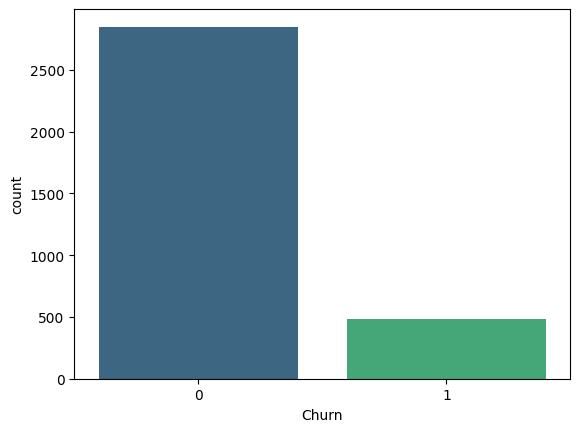

In [17]:
sns.countplot(data=df, x='Churn' ,palette='viridis')

In [18]:
df.dtypes

Churn              category
AccountWeeks          int64
ContractRenewal    category
DataUsage           float64
CustServCalls         int64
DayMins             float64
DayCalls              int64
MonthlyCharge       float64
OverageFee          float64
RoamMins            float64
dtype: object

In [19]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include='category'))
)

In [ ]:
X_train_pre = preprocessing.fit_transform(X_train)
X_test_pre = preprocessing.transform(X_test)

In [ ]:
# X_train_pre = np.array(X_train_pre, dtype=np.float32)
# X_test_pre = np.array(X_test_pre, dtype=np.float32)
# y_train = np.array(y_train, dtype=np.float32)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_pre,y_train)
y_pred = log_reg.predict(X_test_pre)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accu_score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
print(f"Accuracy Score : {round(accu_score,2)}")
print(f"Precision Score : {round(pre_score,2)}")
print(f"Recall Score : {round(rec_score,2)}")

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_pre,y_train)
y_pred = svc.predict(X_test_pre)

In [ ]:
accu_score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
print(f"Accuracy Score : {round(accu_score,2)}")
print(f"Precision Score : {round(pre_score,2)}")
print(f"Recall Score : {round(rec_score,2)}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_pre,y_train)
y_pred = rf.predict(X_test_pre)

In [ ]:
accu_score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
print(f"Accuracy Score : {round(accu_score,2)}")
print(f"Precision Score : {round(pre_score,2)}")
print(f"Recall Score : {round(rec_score,2)}")

`Here precision is more important than recall because in churn prediction, we want to minimize false positives (predicting a customer will churn when they won't) to avoid unnecessary retention efforts and costs.`